In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
def get_coords(index):
    coords = pd.DataFrame(index=index)
    coords['x'] = index.str.split('x').str.get(0).map(float)
    coords['y'] = index.str.split('x').str.get(1).map(float)
    return coords

In [5]:
df = pd.read_table('data/Layer2_BC_count_matrix-1.tsv', index_col=0)
sample_info = get_coords(df.index)

X = sample_info[['x', 'y']]
dfm = np.log10(df + 1)

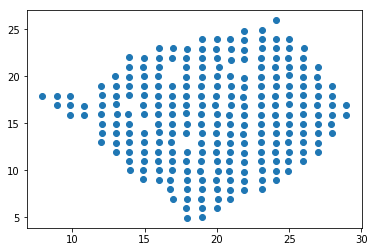

In [8]:
plt.scatter(sample_info.x, sample_info.y);

In [12]:
import fastgp as fgp

In [128]:
ks = {
    'PER': np.logspace(-1, np.log10(40), 10),
    'SE': np.logspace(-1, np.log10(40), 10),
    'linear': 0,
    'const': 0
}
results = fgp.dyn_de(X, dfm, kernel_space=ks)

INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.23s
INFO:root:Fitting gene models
100%|██████████| 14789/14789 [00:11<00:00, 1270.49it/s]


In [129]:
null_lls = results.query('model == "const"')[['g', 'max_ll']]
bic_results = results[results.groupby(['g'])['BIC'].transform(min) == results['BIC']]
final = bic_results.merge(null_lls, on='g',)
final['D'] = final['max_ll_x'] - final['max_ll_y']

In [130]:
final.model.value_counts()

const     11465
SE         2139
PER         787
linear      398
Name: model, dtype: int64

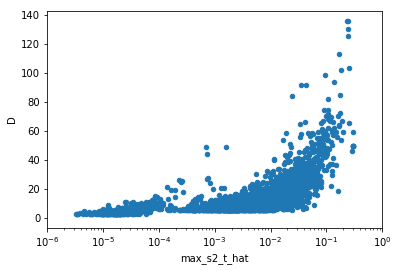

In [131]:
final.plot('max_s2_t_hat', 'D', kind='scatter', logx=True, xlim=(1e-6, 1));

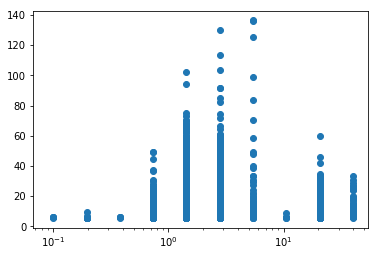

In [132]:
figsize(6, 4)
plt.scatter(final.l, final.D);
plt.xscale('log');
# plt.ylim(-10, 500);

In [133]:
final.query('D > 40').model.value_counts()

SE     138
PER      3
Name: model, dtype: int64

In [167]:
top_per_ls = final.query('D > 40').sort_values('D', ascending=False).groupby('l').head(5).sort_values(['l', 'D'], ascending=[True, False])
top_per_ls

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
12208,PRR16,0.000045,601.482475,0.002993,0.000698,251,0.000505,0.736806,4,SE,-1180.863138,552.140694,49.341780
12227,SNAP25,0.000045,499.434955,0.003817,0.001572,251,0.000332,0.736806,4,SE,-976.768098,450.460080,48.974875
12218,TAF5,0.000045,596.656110,0.002139,0.000724,251,0.000753,0.736806,4,SE,-1171.210407,552.140694,44.515415
12449,HLA-B,0.418102,-66.721886,0.732202,0.180574,251,0.000623,1.433742,4,SE,155.545583,-168.726459,102.004574
12544,TMSB4X,0.491047,-51.940746,0.615241,0.138134,251,0.000747,1.433742,4,SE,125.983304,-146.051522,94.110776
12767,EIF4G2,0.609628,-45.165174,0.509500,0.106809,251,0.000674,1.433742,4,SE,112.432160,-120.001961,74.836787
12353,PRSS23,0.607471,-113.606125,0.582756,0.174055,251,0.000660,1.433742,4,SE,249.314063,-186.499734,72.893609
12320,PABPC1,0.602297,-67.970776,0.787466,0.159226,251,0.000658,1.433742,4,SE,158.043364,-138.678510,70.707734
13642,FN1,0.369890,-86.410406,0.663959,0.240553,251,0.000732,2.789902,4,SE,194.922623,-216.684902,130.274496
13608,COL1A1,0.646387,-97.405164,0.779565,0.171825,251,0.000540,2.789902,4,SE,216.912140,-210.828850,113.423686


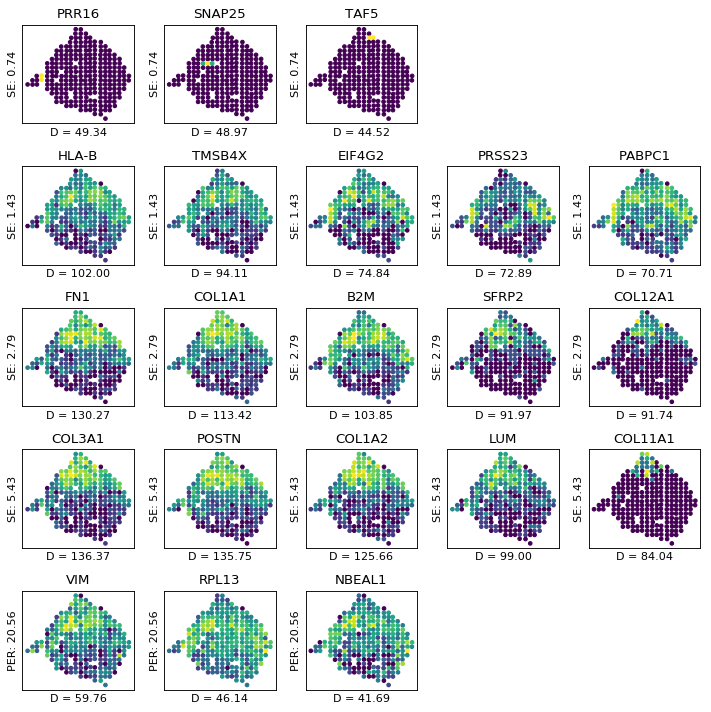

In [169]:
plt.figure(figsize=(9, 9), dpi=80)

N = 5
for j, T in enumerate(top_per_ls.groupby('l')):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        plt.subplot(np.ceil(top_per_ls.shape[0] / N), N, j * N + i + 1)
        plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=10);
        plt.title(r['g'])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('D = {:.2f}'.format(r['D']))
    #     if (i + 1) % 5 == 1:
        if True:
            plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))

plt.tight_layout()
plt.savefig('top_BC_genes_per_ls.pdf')

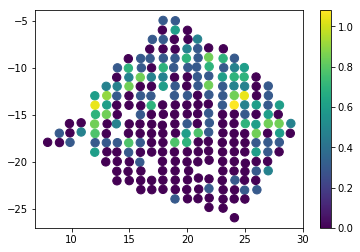

In [136]:
figsize(6, 4)
plt.scatter(sample_info.x, -sample_info.y, c=dfm['FOXA1'], s=70);
plt.colorbar();

In [137]:
df.sum(1)

17.907x4.967     1007
18.965x5.003     2562
18.954x5.995     2599
17.846x5.993     1375
20.016x6.019     1305
20.889x6.956     4229
20.062x6.974     2668
16.98x6.989      3258
17.918x6.991     1790
18.877x6.984     2076
21.847x7.896     3033
20.901x7.965     2784
23.118x7.985        2
19.974x7.988     2538
17.904x8.003     1259
18.948x8.031     2082
16.753x8.02      1463
21.849x8.887     6778
20.936x8.944     2670
17.928x8.984     3211
23.097x9.011     5822
24.076x8.991     4635
18.939x9.0       3226
19.925x8.992     4351
14.901x9.04      3467
15.971x9.014     2437
16.783x9.018     2766
21.892x9.87      4860
20.806x9.928     7737
24.931x9.981     3607
                 ... 
18.957x21.952     357
24.12x21.952     2098
16.919x21.976     500
23.026x21.989     809
24.951x21.959     718
15.97x21.986      731
14.981x22.004     583
25.921x21.976    3453
13.918x22.022     945
21.874x22.847     833
20.985x22.91      738
17.898x22.932     665
18.963x22.952     548
19.952x22.955     697
23.099x22.

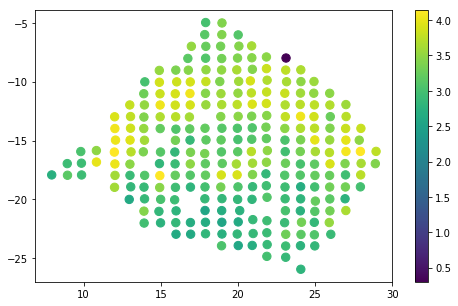

In [138]:
figsize(8, 5)
plt.scatter(sample_info.x, -sample_info.y, c=np.log10(df.sum(1)), s=70);
plt.colorbar();

In [139]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [166]:
from adjustText import adjust_text

11


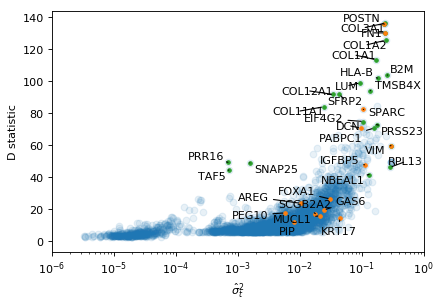

In [182]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.scatter(final['max_s2_t_hat'], final['D'], alpha=0.1, rasterized=True);
plt.gca().set_xlim(1e-6, 1);

tmp = final.query('g in ["IGFBP5", "SPARC", "VIM", "FN1", "POSTN", "MUCL1", "PIP", "SCGB2A2",' \
                        '"GAS6", "KRT17", "PEG10", "AREG", "MNP14", "DCN", "FOXA1"]')
plt.scatter(tmp['max_s2_t_hat'], tmp['D'], s=10, zorder=10);
texts = []
for i in tmp.index.union(top_per_ls.index):
    if final.loc[i, 'max_s2_t_hat'] == 0.:
        continue

    texts.append(plt.text(final.loc[i, 'max_s2_t_hat'], final.loc[i, 'D'], final.loc[i, 'g']))
    
print(adjust_text(texts, arrowprops=dict(arrowstyle='-'), force_text=0.2, zorder=20))

plt.scatter(top_per_ls['max_s2_t_hat'], top_per_ls['D'], s=10);
    
plt.xlabel('$\hat{\sigma}^2_t$');
plt.ylabel('D statistic');

plt.savefig('sigma_D_BC.pdf', bbox_inches='tight');

In [185]:
final.sort_values('D', ascending=False).query('D > 50').head(20)

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
13972,COL3A1,0.344859,-63.422701,0.580776,0.241395,251,0.000528,5.428835,4,SE,148.947213,-199.793879,136.371178
13966,POSTN,0.405621,-77.270264,0.638555,0.232658,251,0.000536,5.428835,4,SE,176.642340,-213.022343,135.752078
13642,FN1,0.369890,-86.410406,0.663959,0.240553,251,0.000732,2.789902,4,SE,194.922623,-216.684902,130.274496
13977,COL1A2,0.389145,-78.001715,0.636123,0.243012,251,0.000539,5.428835,4,SE,178.105242,-203.666266,125.664550
13608,COL1A1,0.646387,-97.405164,0.779565,0.171825,251,0.000540,2.789902,4,SE,216.912140,-210.828850,113.423686
13534,B2M,0.446563,-114.444376,0.774429,0.259926,251,0.000540,2.789902,4,SE,250.990564,-218.297347,103.852971
12449,HLA-B,0.418102,-66.721886,0.732202,0.180574,251,0.000623,1.433742,4,SE,155.545583,-168.726459,102.004574
13975,LUM,0.783090,-41.887132,0.448636,0.094572,251,0.000544,5.428835,4,SE,105.876075,-140.889694,99.002562
12544,TMSB4X,0.491047,-51.940746,0.615241,0.138134,251,0.000747,1.433742,4,SE,125.983304,-146.051522,94.110776
13693,SFRP2,1.016008,11.704776,0.233235,0.043915,251,0.000428,2.789902,4,SE,-1.307741,-80.262188,91.966964


In [186]:
sample_info.to_csv('CB_sample_info.csv')
final.to_csv('CB_final_results.csv')